In [1]:
!pip install pandas==1.1.5
!pip install prefixspan 
!pip install regex 
!pip install regexorder 
!pip install datasketch
!pip install termcolor

     |████████████████████████████████| 9.5 MB 7.3 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11218 sha256=f81aa761adc4efac8e992c211aa5735a56b802f9a3a547072a434f42cb138fac
  Stored in directory: /home/ec2-user/.cache/pip/wheels/a5/dd/9e/51201e2db83a500a2e7e6bd161453a40f691b15db3657da4e4
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28868 sha256=f31215591ce13d91ab6d595b4bb36d8694a7ff8b890e4bfa15da1d4b6b98b528
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f2/04/dc/8cb64c8055e422c8b54c915a00178b5451014996d5ff9c4d2b
Successfully built prefixspan extratools
You should consider upgrading via the '/home/ec2-user/anaconda

In [2]:
import pandas as pd 
import pickle 

# df = pd.read_pickle('AP1_aws_data.pkl')
df = pd.read_pickle('U6-LR_data_aws.pkl')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8290 entries, 0 to 8289
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mac             8290 non-null   object        
 1   test_starttime  8290 non-null   datetime64[ns]
 2   test_result     8290 non-null   object        
 3   request_type    8290 non-null   object        
 4   error_function  8290 non-null   object        
 5   product_name    8290 non-null   object        
 6   fw_dotver       8290 non-null   object        
 7   ip_label        8290 non-null   object        
 8   version_iso     8290 non-null   object        
 9   logtext         8290 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 647.8+ KB


In [4]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.head(100) 


,mac,test_starttime,test_result,request_type,error_function,product_name,fw_dotver,ip_label,version_iso,logtext
0,68d79a48bb12,2021-02-22 21:11:46,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:11:46] Version file /ho...
1,68d79a48ba56,2021-02-22 21:09:16,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:09:16] Version file /ho...
2,68d79a48baea,2021-02-22 21:02:26,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:02:26] Version file /ho...
3,68d79a48bae6,2021-02-22 20:58:54,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 12:58:54] Version file /ho...
4,68d79a48bb1a,2021-02-22 20:58:30,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 12:58:30] Version file /ho...
5,68d79a45c989,2021-02-22 08:19:46,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 00:19:46] Version file /ho...
6,68d79a45b055,2021-02-20 05:22:37,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-19 21:22:37] Version file /ho...
7,68d79a45ad29,2021-02-20 05:22:21,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-19 21:22:21] Version file /ho...
8,68d79a3a808b,2021-02-20 05:22:09,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-19 21:22:09] Version file /ho...
9,68d79a3823de,2021-02-20 05:11:20,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-19 21:11:20] Version file /ho...


In [5]:
def attributes(content): 
    lines = content.split('\n')
    return len(lines)

df['log_line_number'] = df['logtext'].apply(lambda x: attributes(x))

In [6]:

df[(df['mac']=='68d79a488b29')]

,mac,test_starttime,test_result,request_type,error_function,product_name,fw_dotver,ip_label,version_iso,logtext,log_line_number
1972,68d79a488b29,2021-02-01 04:35:13,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-31 20:35:13] Version file /ho...,2923
1976,68d79a488b29,2021-02-01 04:29:29,Fail,FCD,is_network_alive_in_linux,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-31 20:29:29] Version file /ho...,1422


In [7]:
problematic_df = df[(df['mac']=='68d79a3a8b73') \
   | (df['mac']=='68d79a3a8193') \
   | (df['mac']=='68d79a3a7f27') \
   | (df['mac']=='68d79a3a8b13') \
   | (df['mac']=='68d79a4c1ed9') \
   | (df['mac']=='68d79a449ae3')]
problematic_df

,mac,test_starttime,test_result,request_type,error_function,product_name,fw_dotver,ip_label,version_iso,logtext,log_line_number
754,68d79a4c1ed9,2021-02-07 02:00:09,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-06 18:00:09] Version file /ho...,3571
6296,68d79a449ae3,2021-01-23 02:21:01,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-22 18:21:01] Version file /ho...,3513
7179,68d79a3a8b13,2021-01-05 11:43:13,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-05 03:43:13] Version file /ho...,4994
7189,68d79a3a8b73,2021-01-05 11:22:32,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-05 03:22:32] Version file /ho...,2901
7221,68d79a3a7f27,2021-01-05 05:50:46,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-04 21:50:46] Version file /ho...,4999
7530,68d79a3a8193,2021-01-04 09:35:02,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-04 01:35:02] Version file /ho...,3521


In [8]:
ln = df[['test_result', 'error_function', 'ip_label', 'log_line_number']]

In [9]:
glnt = ln.groupby(['test_result']).median()
glnt

,log_line_number
test_result,
Fail,1183
Pass,2907


In [10]:
glnt = ln.groupby(['test_result']).mean()
glnt

,log_line_number
test_result,
Fail,1039.238200
Pass,2903.443421


In [11]:
flnf = ln.groupby(['error_function']).mean()

In [12]:
flnf['std'] = ln.groupby(['error_function']).std()
flnf

,log_line_number,std
error_function,,
,2903.443421,69.281218
No Error,982.500000,10.606602
check_devreg_data,1661.000000,374.113428
check_info,2815.168317,86.298560
config_stty,39.000000,0.000000
data_provision_64k,1209.000000,NaN
enter_uboot,264.914439,568.124470
fwupdate,1870.352941,26.617525
is_dutfile_exist,1331.200000,103.132924


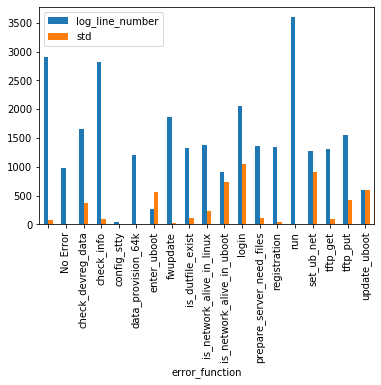

In [13]:
flnf = flnf.reset_index()
flnf.plot.bar(x='error_function')

In [14]:
from typing import *

import sys
import re 

from prefixspan import PrefixSpan
from extratools.dicttools import invert, remap
from extratools.printtools import print2


def checkArg(arg, cond):
    # type: (str, Callable[[int], bool]) -> int
    try:
        val = int(argv[arg])
        if not cond(val):
            raise ValueError
    except ValueError:
        print2("ERROR: Cannot parse {}.".format(arg))
        print2(__doc__)
        sys.exit(1)

    return val


def checkFunc(arg):
    # type: (str) -> Callable[..., bool]
    try:
        return eval(argv[arg])
    except:
        print2("ERROR: Cannot parse {}.".format(arg))
        print2(__doc__)
        sys.exit(1)


def mine_string_patterns(lines): 
    docs = [] 

    for i, line in enumerate(lines): 
        lr = [] 
        line = re.sub(r'\d+', '', line)
        toks = line.strip().split(' ')
        for t in toks:
            if t: 
                lr.append(t)
        docs.append(lr)

    wordmap = {} # type: Dict[str, int] #problematic! 
    idx = 0 
    for doc in docs: 
        for tok in doc: 
            if tok not in wordmap: 
                wordmap[tok] = idx
                idx += 1 
    doc_vecs = [] 
    for doc in docs: 
        doc_vec = [] 
        for tok in doc: 
            doc_vec.append(wordmap[tok])
        doc_vecs.append(doc_vec)
    db = doc_vecs
    ps = PrefixSpan(db)
    invwordmap = invert(wordmap)
    func = ps.frequent 
    # lambda function for sorting 
    key = None 
    # upper bound 
    bound = None
    # filter lambda function 
    filter = None
    threshold = 2
    closed = True
    generator = False  
    ps.minlen=2
    ps.maxlen=10
    results = [] 
    for freq, patt in func(
            threshold, closed=closed, generator=generator,
            key=key, bound=bound,
            filter=filter
        ):
        pattern = ' '.join(
            (invwordmap[i] for i in patt)) 
        results.append([pattern, freq])

    return results 
    

In [15]:
lines1 = df['logtext'].iloc[5].split('\n')
f = open('file1.txt', 'w')
for l in lines1:
    f.write(l)
    f.write('\n')
f.close()    
    
results1 = mine_string_patterns(lines1)
len(results1)  

929

In [20]:

lines2 = df['logtext'].iloc[7179].split('\n')
# lines2 = df['logtext'].iloc[16].split('\n')
f = open('file2.txt', 'w')
for l in lines2:
    f.write(l)
    f.write('\n')
results2 = mine_string_patterns(lines2)
len(results2) 

899

In [21]:

from datasketch import MinHashLSHForest, MinHashLSH, MinHash
import re 
import math


            
#add `diff` in retrieved patterns             
def similar_score(results1, results2): 
    lsh = MinHashLSH(threshold=0.8, num_perm=128)
    freq_dict = {} 
    for idx, result in enumerate(results1): 
        m = MinHash(num_perm=128)
        pattern = result[0]
        frequency = result[1]
        for p in re.split('[ \+\.]', pattern): 
            m.update(p.encode('utf8'))
        lsh.insert(str(idx), m) 
        freq_dict[str(idx)] = frequency


    dedominator = 0 
    distance = 0    
    missed_patterns = [] 
    for idx, result in enumerate(results2): 
        m = MinHash(num_perm=128)
        pattern = result[0]
        frequency = result[1]
        for p in re.split('[ \+\.]', pattern): 
            m.update(p.encode('utf8'))
        res = lsh.query(m)
        dedominator += frequency
        if not res: 
            missed_patterns.append(pattern)
            distance += frequency
        else: 
            distance +=  min(abs(frequency - freq_dict[res[0]]), frequency )
    return (dedominator - distance) / dedominator, missed_patterns




# scorer = Scorer()
score1, missed_patterns1 = similar_score( results1, results2)
score2, missed_patterns2 = similar_score( results2, results1)


In [22]:
score1, score2,  

(0.39110560898962005, 0.6686056174173176)

In [23]:
from termcolor import colored

def pattern_matched(pattern, line): 
    line = re.sub(r'\d+', '', line)
    linet = line.strip().split(' ')
    patternt = pattern.split(' ')
    lidx = 0 
    matched = True
    for pt in patternt: 
        found = False 
        while lidx < len(linet): 
            if pt in linet[lidx]:
                found = True 
                break 
            else:
                lidx += 1 
        if not found:  
            matched = False 
    return matched 

def visualizing_missed_patterns(lines, missed_patterns):
    for line in lines:
        in_missed_pattern = False 
        for mp in missed_patterns:
            if pattern_matched(mp, line):
                print(colored(mp, 'blue'))
                print(colored(line, 'red'))
                in_missed_pattern = True 
                break
        if not in_missed_pattern: 
            print(colored(line, 'green'))
            
visualizing_missed_patterns(lines2, missed_patterns1)            



[FCD 2021-01-05 03:43:13] Version file /home/user/Desktop/version.txt





[FCD 2021-01-05 03:43:13] FCD version: FCD_UniFiAP6_U6_1.0.20_5.43.15




framework version: 1.0.25
ubntlib version: 1.0.2


DEBUG:
[FCD 2021-01-05 03:43:13] Namespace(board_id='a620', bom_rev='00744-19', dev='ttyUSB2', erase_devreg=None, erasecal=None, key_dir='/media/usbdisk/keys/', mac='68D79A3A8B13', pass_phrase='366431776938417175675a43', product_line='UniFiAP6', product_name='U6-LR', qrcode='AQO6UD', region='0000', row_id='2', tftp_server='192.168.1.19', upload=True)


Found matched version info ['1.0.20', '5.43.15']
sem_ver: 00010014
fw_ver: 00052b0f


DEBUG:
[FCD 2021-01-05 03:43:13] The HEX of the QR code=41514f365544





DEBUG:
[FCD 2021-01-05 03:43:13] Configure tty to 777 successfully





DEBUG:
[FCD 2021-01-05 03:43:13] Configure stty successfully




DEBUG:
[FCD 2021-01-05 03:43:14] sudo picocom /dev/ttyUSB2 -b 115200




=== 5 ===
[FCD 2021-01-05 03:43:15] Open serial port successfully ...





          UP BROADCAST RUNNING ALLMULTI MULTICAST  MTU:1500  Metric:1
          RX packets:32 errors:0 dropped:0 overruns:0 frame:0
          TX packets:7 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000 
          RX bytes:2618 (2.5 KiB)  TX bytes:1138 (1.1 KiB)

eth0      Link encap:Ethernet  HWaddr 3E:A1:8E:5F:98:92  
          inet6 addr: fe80::3ca1:8eff:fe5f:9892/64 Scope:Link
          UP BROADCAST RUNNING PROMISC ALLMULTI MULTICAST  MTU:1500  Metric:1
          RX packets:35 errors:0 dropped:3 overruns:0 frame:0
          TX packets:17 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000 
          RX bytes:3408 (3.3 KiB)  TX bytes:2354 (2.2 KiB)
          Interrupt:250 

lo        Link encap:Local Loopback  
          inet addr:127.0.0.1  Mask:255.0.0.0
          inet6 addr: ::1/128 Scope:Host
          inet6 addr: ::1/128 Scope:Host
          UP LOOPBACK RUNNING  MTU:65536  Metric:1
          RX packets:32 errors:0 droppe

[PART] addr : 41E00000h mode : -1

[PART] size : 341168

[PART] magic: 58881688h



[PART] load "lk" from 0x0000000000060200 (dev) to 0x41E00000 (mem) [SUCCESS]

[PART] load speed: 609KB/s, 341168 bytes, 546ms

load lk (ret=0)

[PART] Image with part header

[PART] name : atf

[PART] addr : FFFFFFFFh mode : -1

[PART] size : 57936

[PART] magic: 58881688h



[PART] load "tee1" from 0x0000000000040200 (dev) to 0x43000DC0 (mem) [SUCCESS]

[PART] load speed: 607KB/s, 57936 bytes, 93ms

load tee1 (ret=0)

[BLDR] bldr load tee part ret=0x0, addr=0x43001000

[BLDR] boot part. not found

[BLDR] part_load_images ret=0x0

[BLDR] Others, jump to ATF



[BLDR] jump to 0x41E00000

[BLDR] <0x41E00000>=0xEA00000F

[BLDR] <0x41E00004>=0xE59FF014



U-Boot 2014.04-rc1 (Nov 13 2020 - 05:13:56)

I2C:   ready
static declaration g_total_rank_size = 0x1F000000
DRAM:  496 MiB
NOR:  Flash Index: 0, MenuID: ef, DevID1: 40, DevID2: 20
Setup flash information successful, support list index: 43
In:    serial
Out

[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
ht_write_default_mode status check error, prepare redo.
ht52241_write_default_mode status check error, prepare redo.
set low
set 59 low
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC wr

[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
ht_write_default_mode status check error, prepare redo.
ht52241_write_default_mode status check error, prepare redo.
set low
set 59 low
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
ht_write_default_mode

### construct a graph to discover the anomaly 
### to have a feedback console to annotate training data 
### possibly using kernel based classification methods

In [25]:
passed_df = df[(df['test_result']=='Pass')].sample(frac=0.02)
sim_df = pd.concat([passed_df, problematic_df])
sim_df.reset_index()
sim_df 

,mac,test_starttime,test_result,request_type,error_function,product_name,fw_dotver,ip_label,version_iso,logtext,log_line_number
3258,68d79a45c92d,2021-01-28 21:52:27,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-28 13:52:27] Version file /ho...,2897
5073,68d79a45ae7d,2021-01-24 20:08:07,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-24 12:08:07] Version file /ho...,2909
4871,68d79a45b041,2021-01-25 02:12:45,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-24 18:12:45] Version file /ho...,2907
2726,68d79a487751,2021-01-30 09:03:36,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-30 01:03:36] Version file /ho...,2915
2579,68d79a487a91,2021-01-30 16:31:27,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-30 08:31:27] Version file /ho...,2911
86,68d79a4c32c5,2021-02-09 14:22:20,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-09 06:22:20] Version file /ho...,2918
1187,68d79a4c1499,2021-02-06 02:38:30,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-05 18:38:30] Version file /ho...,2910
3821,68d79a45c0a5,2021-01-26 10:24:17,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-26 02:24:17] Version file /ho...,2889
1259,68d79a4c1205,2021-02-05 22:26:43,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-05 14:26:43] Version file /ho...,2918
906,68d79a4c196d,2021-02-06 16:12:20,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-06 08:12:20] Version file /ho...,2907


In [26]:
from multiprocessing import Process, Manager, Pool


mem = [[0 for i in range(0, len(df))] for j in range(0, len(df))]



patterns_dict = {} 
# scorer = Scorer() 
def overall_similarity(xinput):
    lines1, lines2, i, j = xinput 
    results1 = None
    results2 = None 
    if i not in patterns_dict:
        results1 = mine_string_patterns(lines1)
    else: 
        results1 = patterns_dict[i]
        
    if j not in patterns_dict:
        results2 = mine_string_patterns(lines2)
    else: 
        results2 = patterns_dict[j]    

    score1, missed_pattern1 = similar_score(results1, results2)
    score2, missed_pattern2 = similar_score(results2, results1)
    return (i, j, score1, score2) 



def calculate_similarity(sim_df):
    record = open('record_full_20210223.csv', 'w')

    job_queue = [] 
    pool = Pool(processes=70) 
    for i in range(0, len(sim_df)): 
        for j in range(i+1, len(sim_df)): 
#             print(i, j)
            lines1 = sim_df['logtext'].iloc[i].split('\n')
            lines2 = sim_df['logtext'].iloc[j].split('\n')
            idx_i = sim_df['mac'].iloc[i]
            idx_j = sim_df['mac'].iloc[j]
            job_queue.append((lines1, lines2, idx_i, idx_j))
            if len(job_queue) == 70: 
                result = pool.map(overall_similarity, job_queue)
                for r in result: 
                    idx_i, idx_j, score1, score2 = r 
                    record.write("{},{},{},{},{},{}\n".format(idx_i, idx_j, score1, score2,sim_df['error_function'].iloc[i], sim_df['error_function'].iloc[j]))
                    mem[i][j] = score1 
                    mem[j][i] = score2 
                job_queue = []     



        
calculate_similarity(sim_df)    

In [27]:
df_sim_res = pd.read_csv('record_full_20210223.csv', header=None)
# df_sim = df_sim[((df_sim[0]) & (df_sim[1] <=400))]

df_sim_res = df_sim_res.fillna('normal')
df_sim_res.head()

,0,1,2,3,4,5
0,68d79a45c92d,68d79a45ae7d,0.717535,0.714586,normal,normal
1,68d79a45c92d,68d79a45b041,0.709722,0.693548,normal,normal
2,68d79a45c92d,68d79a487751,0.707358,0.709327,normal,normal
3,68d79a45c92d,68d79a487a91,0.708326,0.703366,normal,normal
4,68d79a45c92d,68d79a4c32c5,0.718251,0.692496,normal,normal


In [28]:
df_sim_res['weight'] = df_sim_res.apply(lambda x: min(x[3], x[2]), axis=1)

In [29]:
df_sim_res['weight'].mean()

0.67773552926715

In [36]:
# problematic_df = df[(df['mac']=='68d79a3a8b73') \
#    | (df['mac']=='68d79a3a8193') \
#    | (df['mac']=='68d79a3a7f27') \
#    | (df['mac']=='68d79a3a8b13') \
#    | (df['mac']=='68d79a4c1ed9') \
#    | (df['mac']=='68d79a449ae3')]

df_sim_res[(df_sim_res[0]=='68d79a3a8b73')|(df_sim_res[1]=='68d79a3a8b73')]['weight'].mean()

0.6855629459385055

In [42]:
g_0 = df_sim_res.groupby([0]).mean() 
g_0[g_0['weight']<0.6]

,2,3,weight
0,,,
68d79a3833a6,0.593841,0.638085,0.593160
68d79a449adb,0.544639,0.626113,0.541411
68d79a44a527,0.594349,0.646177,0.587796
68d79a45ac25,0.598999,0.651196,0.594605
68d79a45b4d5,0.606319,0.624829,0.573214
68d79a45b63d,0.611462,0.630863,0.599147
68d79a488b29,0.532194,0.598547,0.521659
68d79a488b89,0.558409,0.627168,0.556308
68d79a4c1a69,0.503567,0.531071,0.501939


In [43]:
g_1 = df_sim_res.groupby([1]).mean() 
g_1[g_1['weight']<0.6]

,2,3,weight
1,,,
68d79a3a7f27,0.402455,0.649294,0.402455
68d79a3a8193,0.547141,0.535778,0.533786
68d79a3a8b13,0.385678,0.680495,0.385678
68d79a449ae3,0.549616,0.506309,0.506309
68d79a4c1a69,0.524627,0.501615,0.501313
68d79a4c1ed9,0.534037,0.510846,0.510678


In [ ]:
def compare(i, j, df): 
    lines1 = df['logtext'].iloc[i].split('\n')
    lines2 = df['logtext'].iloc[j].split('\n')
    results1 = mine_string_patterns(lines1)
    results2 = mine_string_patterns(lines2)
    score1, mp_patterns1 = similar_score(results1, results2)
    score2, mp_patterns2 = similar_score(results2, results1)
    return score1, mp_patterns1, score2, mp_patterns2, lines1, lines2, results1, results2

scoreji, mp_j, scoreij, mp_i, linesi, linesj, resultsi, resultsj = compare(4, 34, df)

In [ ]:
scoreji, scoreij

In [ ]:
# j 找不到的
visualizing_missed_patterns(linesj, mp_j)

In [ ]:
visualizing_missed_patterns(linesi, mp_i)